## Libraries

In [0]:
!pip install es_lemmatizer
!python -m spacy download es_core_news_sm

In [0]:
import re
import pandas as pd
import seaborn as sns
from es_lemmatizer import lemmatize

import spacy

nlp = spacy.load("/usr/local/lib/python3.6/dist-packages/es_core_news_sm/es_core_news_sm-2.2.5")
nlp.add_pipe(lemmatize, after="tagger")

## Files upload

In [0]:
f = open("/content/book.txt", "r") 
f = [line for line in f.readlines() if line.strip()]

## Lemmatize words to dictionary of frequency

Number of words in the text:  110042
Number of unique lemms in the text:  7412


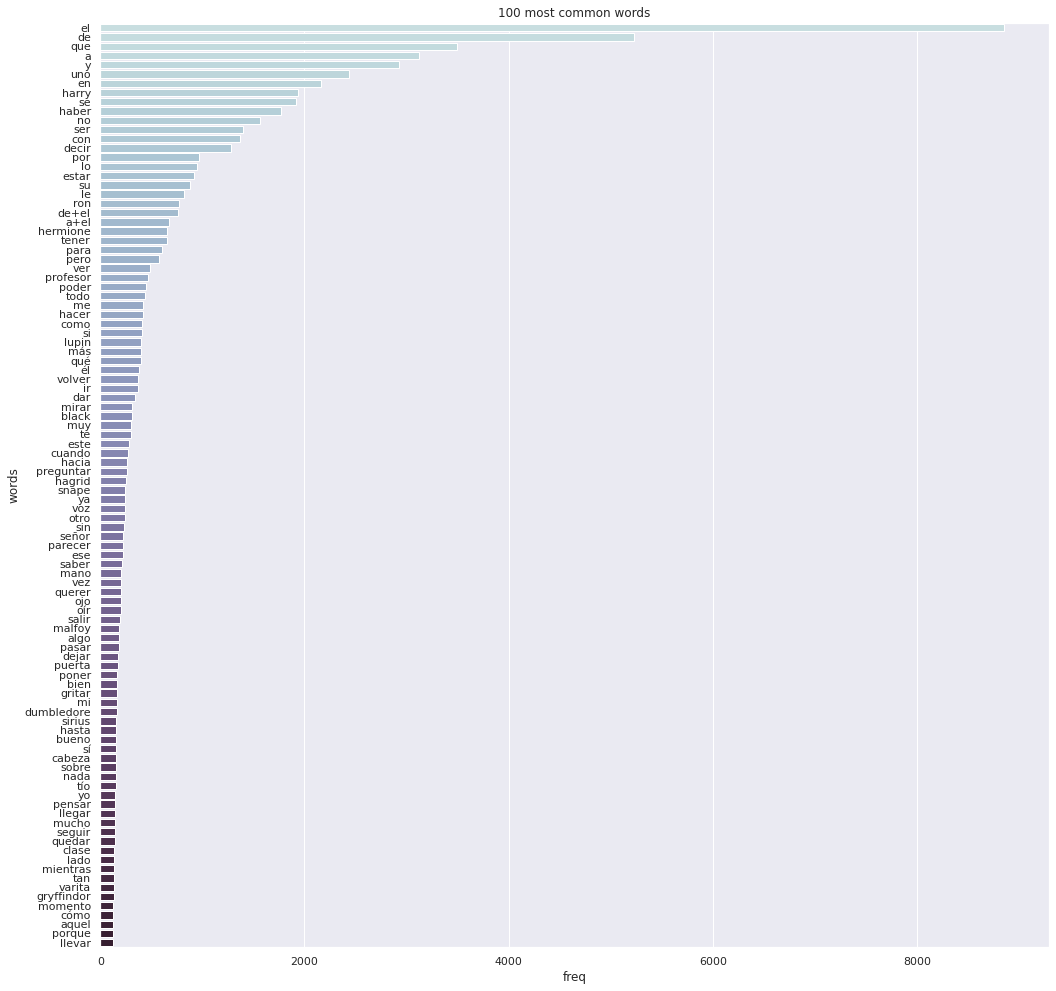

In [5]:
org_num_words = 0
for line in f:
  org_num_words += len(line.split())
print('Number of words in the text: ', org_num_words)

words_lemma = {}
for i in range(len(f)):
  for token in nlp(re.sub('[:,\d\n?¿!¡()-.«»:;+©]|[\\x97]|[\\x92]', '', f[i])):
    if token.lemma_ in words_lemma.keys():
      words_lemma[token.lemma_] += 1 
    else:
      words_lemma[token.lemma_] = 1

words_lemma_df = pd.DataFrame({'words':list(words_lemma.keys()), 'freq': list(words_lemma.values())}).sort_values(by=['freq'], ascending = False)
print('Number of unique lemms in the text: ', len(words_lemma))

sns.set(rc={'figure.figsize':(17,17)})
sns.barplot(x='freq',y='words',data=words_lemma_df.head(100), palette = sns.cubehelix_palette(100, start=.75, rot=-.5)).set_title('100 most common words');

In [0]:
words_lemma_df.to_csv('/content/data_or.csv')

In [0]:
levels = [(500, 'A1'),(1000, 'A2'),(2000, 'B1'),(4000, 'B2'),(8000,'C1'),(16000, 'C2'), ('more', 'fluent')]

In [25]:
for i in range(len(levels)-1):
  print('{} {} - {}'.format(levels[i][1],levels[i][0],levels[i+1][0]))

A1 500 - 1000
A2 1000 - 2000
B1 2000 - 4000
B2 4000 - 8000
C1 8000 - 16000
C2 16000 - more


In [0]:
def get_level(number_unique_lemma, levels):
  for i in range(len(levels)-1):
    if levels[i][0] > number_unique_lemma:
      levels_of_book = (levels[i-1], levels[i])
      break
    else:
      levels_of_book = levels[-2:]
  print('Number of unique words is {} which is approximately levels {}-{} (betwen {} and {} words).'.format(number_unique_lemma,
                                                                                                         levels_of_book[0][1],levels_of_book[1][1],
                                                                                                         levels_of_book[0][0],levels_of_book[1][0]))
  return(levels_of_book)

In [43]:
number_unique_lemma = len(words_lemma)
levels_of_book_initial = get_level(number_unique_lemma, levels)

Number of unique words is 7412 which is approximately levels B2-C1 (betwen 4000 and 8000 words).


Really? Almost C1 to understand the Harry Potter? This doesn't seem corect. Children all over the world are reading it without having a degree (C1-C2 are considered to be college-level language). So let's dig deeper!

Do you usually understand 100% of what you are reading? Even in your mother tongue? Yeah, you can guess some words and something just understand from the context. So what's a threshold? Let's for the sake of the experiment we say that we need to understand 90%, 93% or 95% of the text to say we **understand** it. Will the level of the book change a lot? (spoiler: it will ;) )


words_df = words_df.drop(index = 4833)
words_df = words_df.drop(index = 9810)
words_df = words_df.drop(index = 9983)
words_df = words_df.drop(index = 4975)
words_df = words_df.drop(index = 117)
words_df = words_df.drop(index = 12076)

In [0]:
num_words_lemms = 0
for _, row in words_lemma_df.iterrows():
  num_words_lemms += row['freq']

In [0]:
def custom_range(max_val):
  result = [25, 50, 100] + [i*200 for i in range(1,5)]+ [i*1000 for i in range(1, max_val//1000+1)]
  if max_val%1000 == 0:
    return result
  else:
    return result + [max_val]

In [0]:
def count_percents(words_df, num_words, max_num = None):
  info = []
  if not max_num:
    max_num = words_df.shape[0]
  custom_ranges = custom_range(max_num)
  for index in range(0,max_num,25) or index == max_num:
    sums = 0
    for _, row in words_df.head(index).iterrows():
      sums += row['freq']
    if index in custom_ranges:
      print('{} most frequent words is {:2.2f}% of the text'.format(index, sums/num_words*100))
    info.append([index, sums/num_words*100])
  return info

In [67]:
counts = count_percents(words_lemma_df, num_words_lemms)

25 most frequent words is 43.71% of the text
50 most frequent words is 52.13% of the text
100 most frequent words is 59.88% of the text
200 most frequent words is 68.18% of the text
400 most frequent words is 76.69% of the text
600 most frequent words is 81.36% of the text
800 most frequent words is 84.41% of the text
1000 most frequent words is 86.64% of the text
2000 most frequent words is 92.58% of the text
3000 most frequent words is 95.24% of the text
4000 most frequent words is 96.90% of the text
5000 most frequent words is 97.81% of the text
6000 most frequent words is 98.72% of the text
7000 most frequent words is 99.63% of the text


In [68]:
for percent in [90,93,95]:
  for line in counts:
    if line[1]>percent:
      print('Knowing {} words you will understand {}% of the text'.format(line[0], line[1]))
      get_level(line[0], levels)
      print()      
      break

Knowing 1450 words you will understand 90.04453330909752% of the text
Number of unique words is 1450 which is approximately levels A2-B1 (betwen 1000 and 2000 words).

Knowing 2125 words you will understand 93.0300827047169% of the text
Number of unique words is 2125 which is approximately levels B1-B2 (betwen 2000 and 4000 words).

Knowing 2875 words you will understand 95.01045169499227% of the text
Number of unique words is 2875 which is approximately levels B1-B2 (betwen 2000 and 4000 words).



And this is what we have been looking for! Knowing just 1450 words you will understand a bit more than 90% of the text. And with 2800 more than 95%. 

<Figure size 1224x1224 with 0 Axes>

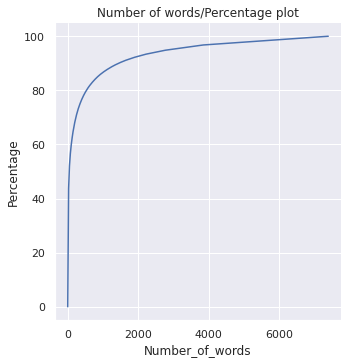

In [69]:
import matplotlib.pyplot as plt

fig = plt.figure()
ax = sns.relplot(x = 'Number_of_words', y = 'Percentage', kind="line", data=pd.DataFrame(counts, columns = ['Number_of_words', 'Percentage']))
plt.title('Number of words/Percentage plot')
plt.show()

## Removing stop words

In [0]:
import nltk
from nltk.corpus import stopwords
nltk.download('stopwords')
stop_words = stopwords.words('spanish')

words_we_dont_need = ['1', 'harry', 'potter', 'ron', 'hermione', 'dumbledore', 'hagrid', 'snape', 'weasley', 'malfoy', 'dudley', 'vernon',
                      'voldemort', 'ginny','gryffindor', 'mcgonagall', 'neville', 'george', 'lupin', 'sirius', 'fred', 'trelawney',
                      '\t', ' ', '  ', '   ', '    ', '     ', '"', ' ','de+el', 'a+el']

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


In [0]:
words_lemma_no_stopword = words_lemma.copy()

for word in stop_words+words_we_dont_need:
  if word in words_lemma_no_stopword.keys():
    del words_lemma_no_stopword[word]

In [0]:
len(stop_words+words_we_dont_need)

342

9810  4833   9983  117 12076



In [0]:
words_lemma_no_stopword_df = pd.DataFrame({'words':list(words_lemma_no_stopword.keys()), 'freq': list(words_lemma_no_stopword.values())}).sort_values(by=['freq'], ascending = False)

num_lemma_no_stopword = 0
for _, row in words_lemma_no_stopword_df.iterrows():
  num_lemma_no_stopword += row['freq']

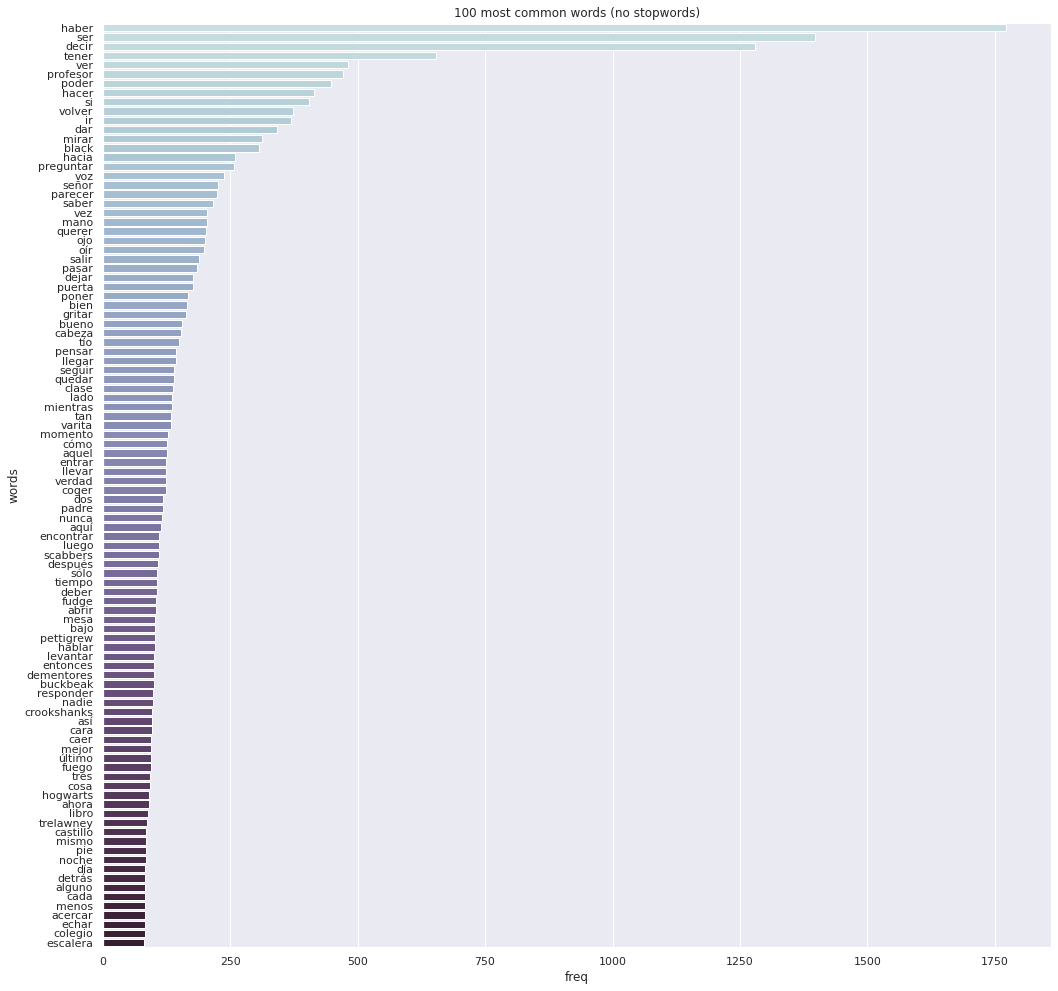

In [0]:
sns.set(rc={'figure.figsize':(17,17)});
sns.barplot(x='freq',y='words',data=words_lemma_no_stopword_df.head(100), palette = sns.cubehelix_palette(100, start=.75, rot=-.5)).set_title('100 most common words (no stopwords)');

In [0]:
counts_no_stopwords = count_percents(words_lemma_no_stopword_df, num_lemma_no_stopword)

25 most frequent words is 20.37% of the text
50 most frequent words is 26.92% of the text
100 most frequent words is 35.55% of the text
200 most frequent words is 46.73% of the text
400 most frequent words is 59.33% of the text
600 most frequent words is 66.77% of the text
800 most frequent words is 72.01% of the text
1000 most frequent words is 75.84% of the text
2000 most frequent words is 86.41% of the text
3000 most frequent words is 91.21% of the text
4000 most frequent words is 94.21% of the text
5000 most frequent words is 95.99% of the text
6000 most frequent words is 97.77% of the text
7000 most frequent words is 99.55% of the text


<Figure size 1224x1224 with 0 Axes>

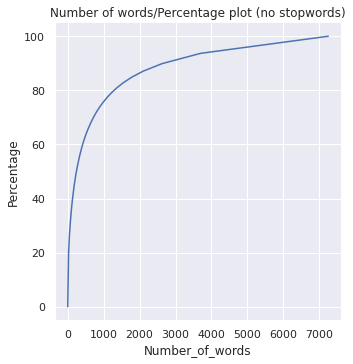

In [0]:
fig = plt.figure()
ax = sns.relplot(x = 'Number_of_words', y = 'Percentage', kind="line", data=pd.DataFrame(counts_no_stopwords, columns = ['Number_of_words', 'Percentage']))
plt.title('Number of words/Percentage plot (no stopwords)')
plt.show()

## Bigrams

In [0]:
import nltk
from nltk import word_tokenize
from nltk.util import ngrams

nltk.download('punkt')

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.


True

In [0]:
def make_dict_bigrams(f):
  words = {}
  for i in range(len(f)):
    text = " ".join([i.lemma_ for i in nlp(re.sub('[:,\d\n?¿!¡()-.«»:;+©]|[\\x97]|[\\x92]', '', f[i]))])
    token = nltk.word_tokenize(text)
    bigrams = ngrams(token,2)
    for token in bigrams:
      if token in words.keys():
        words[token] += 1 
      else:
        words[token] = 1
  
  print('Number of unique bigrams in the text: ', len(words))

  words_df = pd.DataFrame({'bigrams':list(words.keys()), 'freq': list(words.values())}).sort_values(by=['freq'], ascending = False)
  sns.set(rc={'figure.figsize':(17,17)})
  sns.barplot(x='freq',y='bigrams',data=words_df.head(50), palette = sns.cubehelix_palette(50, start=.75, rot=-.5)).set_title('50 most common bigrams');
  return words_df

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:7: DeprecationWarning: generator 'ngrams' raised StopIteration
  import sys


Number of unique bigrams in the text:  43593


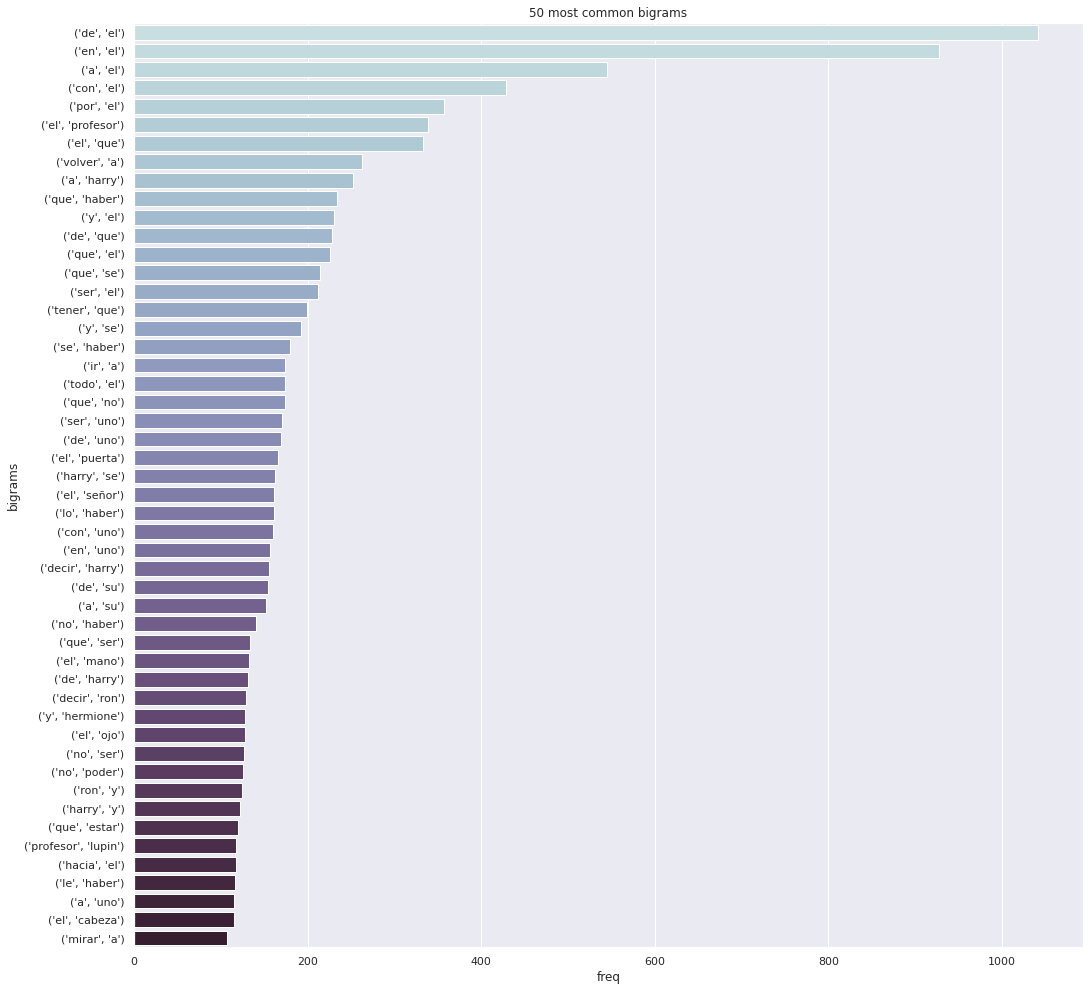

In [0]:
bigrams =  make_dict_bigrams(f)

In [0]:
f_no_stopwords = [word.lemma_ for word in nlp(re.sub('[:,\d\n?¿!¡()-.«»:;+©]|[\\x97]|[\\x92]', '', line)) if word.lemma_ not in stop_words+words_we_dont_ne]

In [0]:
f_no_stopwords = []

for i in range(len(f)):
  f_no_stopwords+=[[]]
  for word in nlp(re.sub('[:,\d\n?¿!¡()-.«»:;+©]|[\\x97]|[\\x92]', '', f[i])):
    if word.lemma_ not in stop_words+words_we_dont_need:
      f_no_stopwords[i] += [word.lemma_]

In [0]:
from nltk import everygrams
list(everygrams(f_no_stopwords[5:15], 3, 3))

In [0]:
bigram_big_words = {}
for line in f_no_stopwords:
  for trigram in list(everygrams(line, 2, 2)):
    if ' '.join(trigram) in bigram_big_words.keys():
      bigram_big_words[' '.join(trigram)]+=1
    else:
      bigram_big_words[' '.join(trigram)]=1

In [0]:
for i in ['tío marge', 'profesor trelawney', 'tío vernon', 'señor pomfrey', 'crabbe goyle']:
  del bigram_big_words[i]

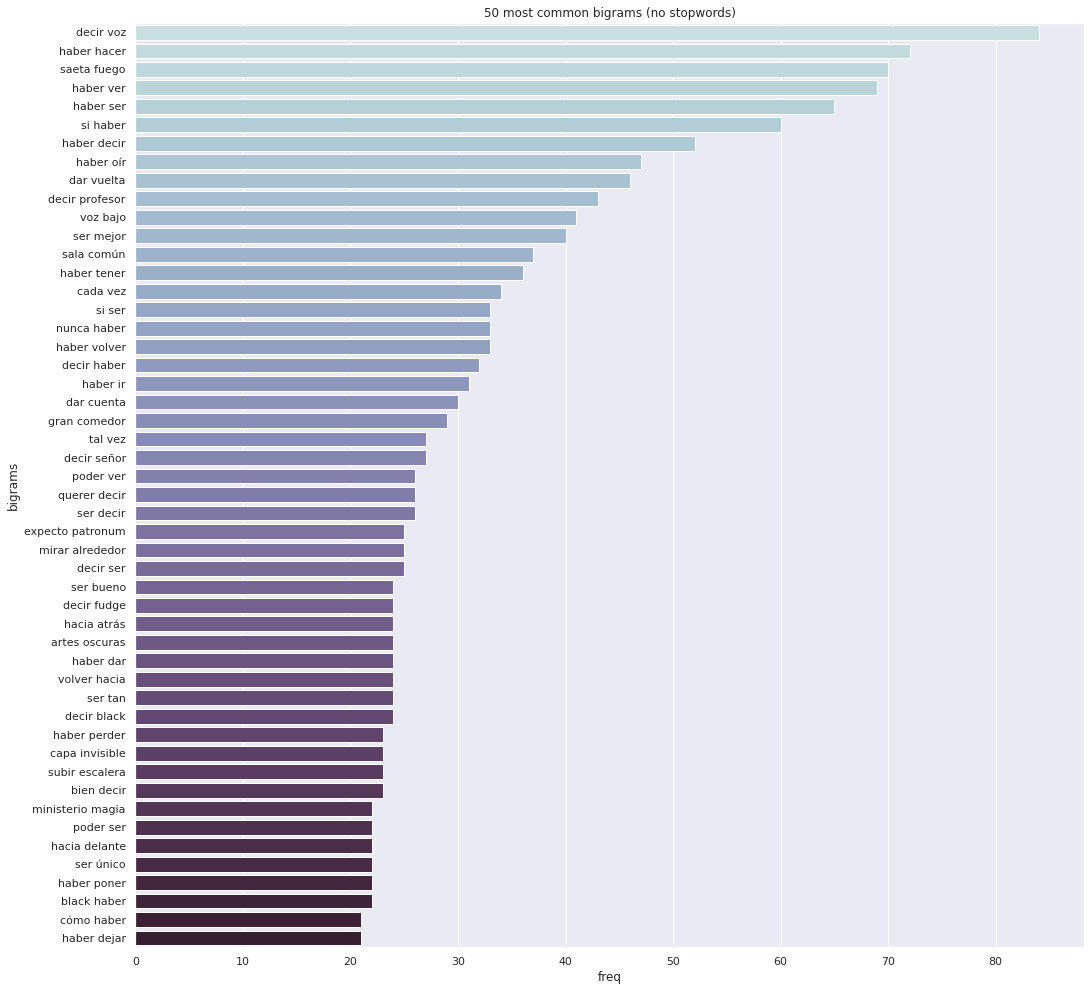

In [0]:
bigram_big_words_df = pd.DataFrame({'bigrams':list(bigram_big_words.keys()), 'freq': list(bigram_big_words.values())}).sort_values(by=['freq'], ascending = False)
sns.set(rc={'figure.figsize':(17,17)})
sns.barplot(x='freq',y='bigrams',data=bigram_big_words_df.head(50), palette = sns.cubehelix_palette(50, start=.75, rot=-.5)).set_title('50 most common bigrams (no stopwords)');

## Stemming

In [0]:
from nltk.stem import SnowballStemmer
stemmer = SnowballStemmer('spanish')

In [0]:
words_stem = {}
for line in f_no_stopwords:
  for word in line:
    if stemmer.stem(word) in words_stem.keys():
      words_stem[stemmer.stem(word)]+=1
    else:
      words_stem[stemmer.stem(word)]=1

In [0]:
words_stem_df = pd.DataFrame({'stems':list(words_stem.keys()), 'freq': list(words_stem.values())}).sort_values(by=['freq'], ascending = False)

In [0]:
len(words_stem_df)

4741

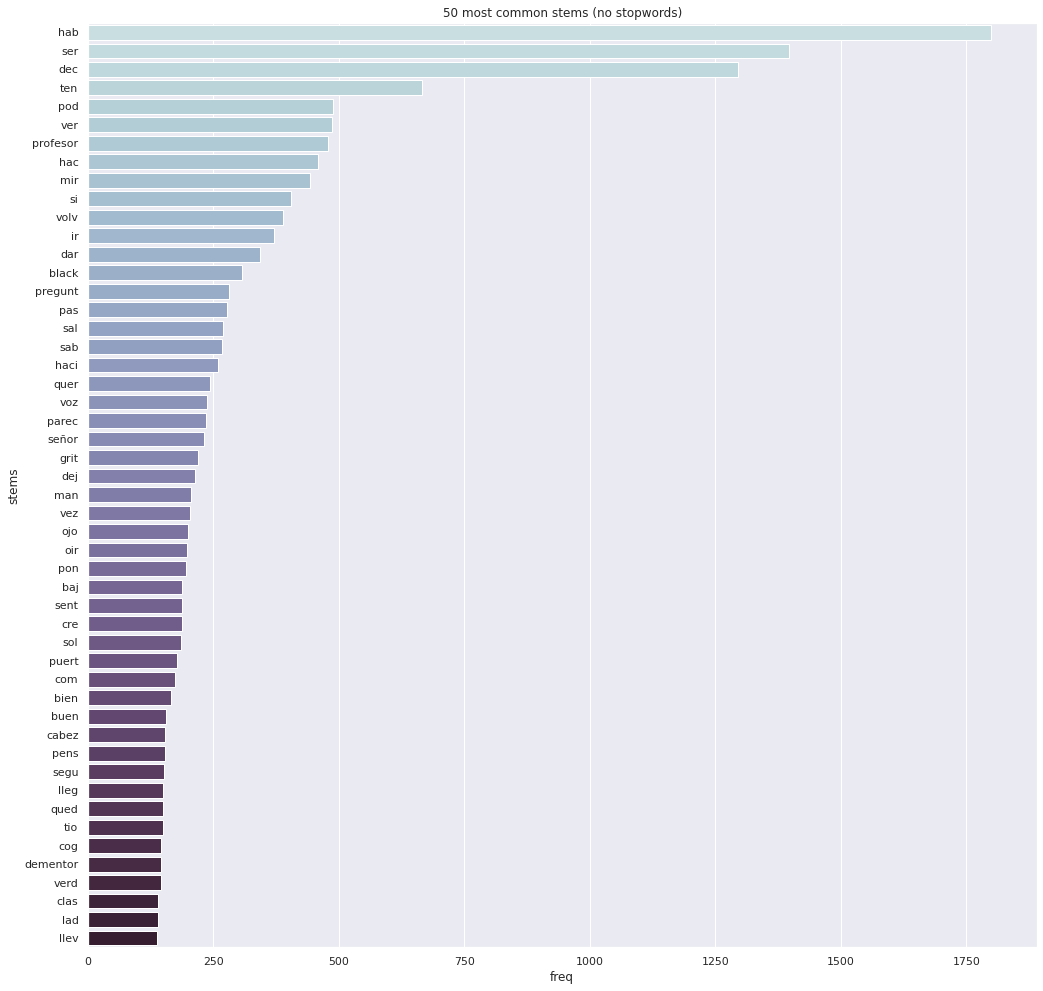

In [0]:
sns.set(rc={'figure.figsize':(17,17)})
sns.barplot(x='freq',y='stems',data=words_stem_df.head(50), palette = sns.cubehelix_palette(50, start=.75, rot=-.5)).set_title('50 most common stems  (no stopwords)');

# And?

So more or less we can understand what is going on the text. But what I was aming for is a statistics you can use for the understanding the level of the book in the linguistic meaning. So after just taking a quick pick on the data you can evaluate time and effords you need to read it depence on your language level.

I want to visualize what is really needed from this pile of the information. 